# Martin Pring's Special K

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:pring_s_special_k

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [15]:
# input
symbol = '^gspc'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03 00:00:00-05:00,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06 00:00:00-05:00,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07 00:00:00-05:00,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08 00:00:00-05:00,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000


In [16]:
import talib as ta

In [17]:
df['200MA'] = df['Adj Close'].rolling(200).mean()

In [18]:
df['SMA10'] = ta.SMA(df['Adj Close'], timeperiod=10)
df['SMA15'] = ta.SMA(df['Adj Close'], timeperiod=15)
df['SMA50'] = ta.SMA(df['Adj Close'], timeperiod=50)
df['SMA65'] = ta.SMA(df['Adj Close'], timeperiod=65)
df['SMA75'] = ta.SMA(df['Adj Close'], timeperiod=75)
df['SMA100'] = ta.SMA(df['Adj Close'], timeperiod=100)
df['SMA130'] = ta.SMA(df['Adj Close'], timeperiod=130)
df['SMA195'] = ta.SMA(df['Adj Close'], timeperiod=195)

df['ROC10'] = ta.ROC(df['SMA10'], timeperiod=10)
df['ROC15'] = ta.ROC(df['SMA10'], timeperiod=15)
df['ROC20'] = ta.ROC(df['SMA10'], timeperiod=20)
df['ROC30'] = ta.ROC(df['SMA15'], timeperiod=30)
df['ROC40'] = ta.ROC(df['SMA50'] , timeperiod=40)
df['ROC65'] = ta.ROC(df['SMA65'], timeperiod=65)
df['ROC75'] = ta.ROC(df['SMA75'], timeperiod=75)
df['ROC100'] = ta.ROC(df['SMA100'], timeperiod=100)
df['ROC195'] = ta.ROC(df['SMA130'], timeperiod=100)
df['ROC265'] = ta.ROC(df['SMA130'], timeperiod=265)
df['ROC390'] = ta.ROC(df['SMA130'], timeperiod=390)
df['ROC530'] = ta.ROC(df['SMA195'], timeperiod=530)

In [19]:
df['Special_K'] = (df['ROC10'] * 1) + (df['ROC15'] * 2) + (df['ROC20'] * 3) + (df['ROC30']) * 4 + (df['ROC40'] * 1) + (df['ROC65'] * 2) + (df['ROC75'] * 3) + (df['ROC100'] * 4) + (df['ROC195'] * 1) + (df['ROC265'] * 2) + (df['ROC390'] * 3) + (df['ROC530'] * 4)

In [20]:
df['200MAk'] = df['Special_K'].rolling(5).mean()

In [21]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,200MA,SMA10,SMA15,SMA50,...,ROC40,ROC65,ROC75,ROC100,ROC195,ROC265,ROC390,ROC530,Special_K,200MAk
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23 00:00:00-05:00,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000,4016.858315,3893.857007,3914.031999,3885.761816,...,0.937676,-3.960492,-3.782119,-4.938555,-6.400278,-11.912113,-0.849772,27.844243,35.607262,48.894200
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000,4014.983015,3877.726001,3902.725993,3890.685415,...,1.266904,-3.883414,-3.891556,-5.004826,-6.357455,-11.975360,-0.946294,27.688049,29.170250,42.551866
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000,4013.033566,3854.083008,3892.189990,3892.790815,...,1.510086,-3.781865,-4.054711,-5.086289,-6.310345,-12.049213,-1.060545,27.537998,21.869472,35.861537
2022-12-29 00:00:00-05:00,3805.449951,3858.189941,3805.449951,3849.280029,3849.280029,3003680000,4010.967715,3839.479004,3886.547331,3895.376816,...,1.727073,-3.605717,-4.067790,-5.128707,-6.257048,-12.126961,-1.179500,27.386517,17.351030,29.302927
2022-12-30 00:00:00-05:00,3829.060059,3839.850098,3800.340088,3839.500000,3839.500000,2979870000,4008.375916,3833.854004,3878.279997,3898.263618,...,1.999062,-3.491792,-4.067533,-5.143207,-6.194935,-12.210910,-1.297572,27.248929,14.081797,23.615962


In [22]:
df = df.dropna()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


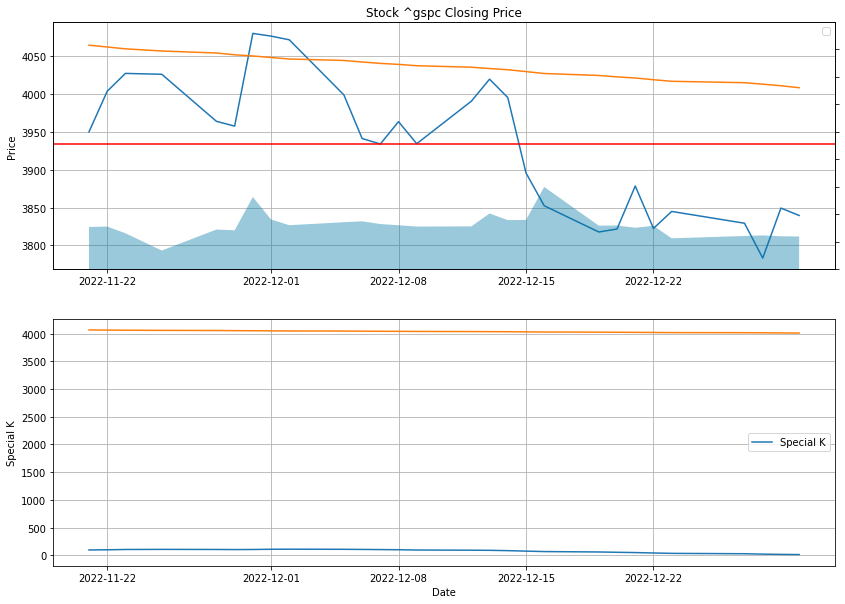

In [23]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['200MA'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.grid()
#ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax1.minorticks_on()
#ax1.legend(loc='best')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Special_K'], label='Special K')
ax2.plot(df['200MA'])
ax2.grid()
ax2.set_ylabel('Special K')
ax2.set_xlabel('Date')
ax2.legend(loc='best')